# Сборный проект

## Описание проекта

**Краткое описание проекта:**
Мы проведем анализ данных о продажах компьютерных игр в интернет-магазине "Стримчик". Имеющиеся данные включают информацию о продажах игр, оценки критиков и пользователей, жанры, платформы и рейтинг ESRB. Наша цель - выявить закономерности, определяющие успешность игр, и сделать прогнозы для планирования рекламных кампаний.

**Цель проекта:**
Выявить факторы, определяющие успешность компьютерных игр, и составить рекомендации по планированию рекламных кампаний на основе анализа исторических данных о продажах.

**Описание данных:**
Датасет содержит информацию о компьютерных играх до 2016 года. В нем присутствуют следующие переменные:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (млн копий)
- EU_sales — продажи в Европе (млн копий)
- JP_sales — продажи в Японии (млн копий)
- Other_sales — продажи в других странах (млн копий)
- Critic_Score — оценка критиков (максимум 100) 
- User_Score — оценка пользователей (максимум 10) 
- Rating — рейтинг ESRB

**План работы:**

1. Открытие файла с данными и изучение общей информации.
2. Подготовка данных: замена названий столбцов, преобразование типов данных, обработка пропусков, расчет суммарных продаж.
3. Исследовательский анализ данных: анализ количества выпущенных игр по годам, изменение продаж по платформам, выбор актуального периода для анализа, выявление лидирующих платформ, построение графика "ящик с усами" по глобальным продажам игр, анализ влияния отзывов на продажи, анализ распределения игр по жанрам.
4. Составление портрета пользователя каждого региона: определение самых популярных платформ и жанров, влияния рейтинга ESRB на продажи.
5. Проверка гипотез: сравнение средних пользовательских рейтингов платформ Xbox One и PC, сравнение средних пользовательских рейтингов жанров Action и Sports.
6. Написание общего вывода.






## Ход Работы

### Изучим основную информацию о датафрейме. Выведем несколько строк и попробуем что то о нём сказать.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats as st

In [2]:
data_games = pd.read_csv('/datasets/games.csv')
data_games.info()
data_games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Бросается в глаза тип данных в столбце User_score - в столбце мы видим числа с плавающей точкой, а в информации о датафрейме указан тип данных object, что может создавать трудности при работе с данным столбцом. Также внесем косметическое улучшение - приведём название столбцов к змеиному регистру. Попробуем обработать пропуски там, где это возможно.

### Обработка данных

#### Замена названия столбцов

In [3]:
data_games.columns = data_games.columns.str.lower()
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Преобразование столбцов в нужные типы

Перейдем к обработке. Сперва заменим тип данных там, где это возможно. Переведём столбец с годом релиза в цеочисленный тип, чтобы он лучше отображался в таблице без плавающей точки (в тип datetime перевести можно, но в таблицу возвращаются неверные даты релиза, а если мы хотим указать год из типа datetime, то возвращается float64).

Float64 лучше всего подойдёт для столбца user_score.

In [4]:
data_games['year_of_release'] = pd.to_numeric(data_games['year_of_release'],errors='coerce').astype('Int64')
data_games['user_score'] = pd.to_numeric(data_games['user_score'],errors='coerce').astype('float')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### Обработка пропущенных значений

Перейдем к обработке пропущенных значений. Подсчитаем, сколько пропущенных значений в датафрейме.

In [5]:
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Как мы видим, тут большое количество пропусков в разделе с оценками и рейтингом. Также пропуски есть в разделе с датой релиза. Пропуски в столбце с оценками можно объяснить несколькими факторами, среди которых
1. **Общая непопулярность игры** - в связи с этим игра осталась незамеченной со стороны критиков и игроков.
2. **Нишевость игры** - игра не популярна среди широкой аудитории, но среди игровых критиков она получает оценки, это также может быть одной из причин того, что пропусков в столбце с оценками от пользователей больше, чем в столбце с оценками критиков.
3. **Количество оценок недостаточно**, чтобы сформировать определёный рейтинг игры.
4. **Рейтинг ещё формируется** (с этим связано значение tbd в столбце с оценкой пользователей)

Значение **tbd расшифровывается как to be determined**, то есть рейтинг ещё определяется и он не сформирован, в связи с этим можно **заменить его на значение NaN** в связи с отсутствием рейтинга.

С датой релиза причиной пропуска может послужить то, что автор игры не указал дату релиза (её просто нет или она не зафиксирована). Количество пропусков в этом столбце не критично, поэтому пропуски можно оставить.

Говоря же про пропуски в возрастном рейтинге, тут это может быть связано с тем, что ESRB просто не успевает присвоить определённый рейтинг такому большому количеству игр, либо просто не рассматривает непопулярные игры.

Замена пропусков в случае с оценками и рейтингом может значительно исказить данные, так как количество пропусков в этих столбцах довольно большое, лучше оставить их нетронутыми. 

#### Суммарные продажи во всех регионах

Для дальнейшего анализа следует определить общие продажи во всех регионах и добавить сумму в новый столбец в датафрейме. 

In [7]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales']+data_games['other_sales']
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


После обработки проведём стандартную проверку на дубликаты. 

In [8]:
data_games.duplicated().sum()

0

In [9]:
duplicate_rows = data_games[data_games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

print(duplicate_rows)

                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
659              NaN      GEN             1993     NaN      1.78      0.53   
14244            NaN      GEN             1993     NaN      0.00      0.00   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  total_sales  
604        0.00         0.23          83.0         5.5      E         2.56  
659        0.00         0.08           NaN         NaN    NaN         2.39  
14244      0.03         0.00           NaN         NaN    NaN         0.03  
16230      0.00         0.00          83.0         5.5      E         0.01  


Проверка на неявные дубликаты показала, что две игры дублируются по названию, платформе и дате релиза. Уберём их из датафрейма. 

In [10]:
data_games = data_games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')
data_games = data_games.dropna(subset=['name', 'genre', 'year_of_release'])

Дублирующиеся строки отсутствуют. Неявные дубликаты устранены. Также были удалены игры с пропусками в жанре, названии и дате релиза.

#### Промежуточные итоги:
1. Были произведены косметические улучшения в данных, включая приведение названий столбцов к нижнему регистру.
2. Произведена обработка типов данных: столбец с годом релиза был переведен в целочисленный тип int64 для лучшей читаемости, а столбец с пользовательскими оценками (user_score) был преобразован во float64.
3. Проанализированы пропуски в данных. Выявлено, что большое количество пропусков наблюдается в столбцах с оценками критиков и пользователей, а также в столбце с возрастным рейтингом (rating). Эти пропуски могут быть обусловлены различными факторами, такими как низкая популярность игры или нехватка данных для формирования рейтинга.
4. Значение 'tbd' в столбце с пользовательскими оценками было заменено на NaN.
5. Пропуски в столбце с датой релиза были оставлены без изменений, так как их количество незначительно, и они могут быть связаны с отсутствием фиксации даты релиза для некоторых игр.
6. Для дальнейшего анализа был добавлен новый столбец с суммарными продажами игр во всех регионах.
7. Проверка на дубликаты показала отсутствие повторяющихся строк.

In [11]:
# Посмотрим, что осталось
temp = data_games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Исследовательский анализ данных.

#### Группировка игр по году выпуска

Сгруппируем игры по году выпуска и ответим на вопрос важны ли данные за разные периоды.

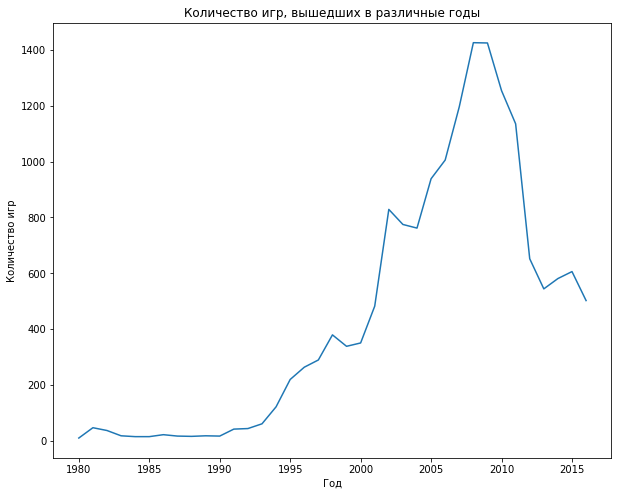

In [12]:
data_year = data_games.groupby('year_of_release')['name'].count()

plt.figure(figsize=(10,8))
plt.plot(data_year.index, data_year.values)
plt.title('Количество игр, вышедших в различные годы')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Как мы видим, игры по годам распределены неравномерно. Тут пик наблюдается в 2008-2010 годах, а количество игр за один год до 1995 года не превышало 200 штук. Так что для того, чтобы спрогнозировать продажи на будущие года, следует взять данные за прошедшие 5-10 лет.

#### Продажи по платформам

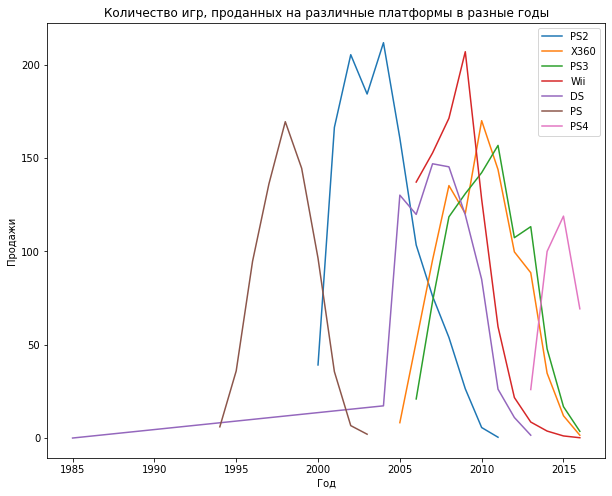

In [13]:
data_platform = data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms = list(data_platform.index[:7])
plt.figure(figsize=(10,8))
for platform in platforms:
    data_platform_year = data_games[data_games['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(data_platform_year.index, data_platform_year.values, label=platform)
plt.title('Количество игр, проданных на различные платформы в разные годы')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.legend()
plt.show()

Как мы видим, есть ошибка в существующих данных - платформа DS вышла в 2004 году, в то время как в таблице есть данные за более ранний период - исправим это. 

In [14]:
data_games = data_games.drop(data_games[(data_games['platform'] == 'DS') & (data_games['year_of_release'] < 2004)].index)

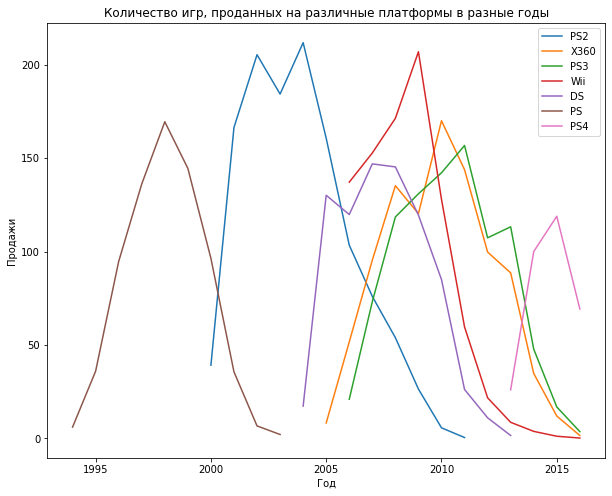

In [15]:
data_platform = data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms = list(data_platform.index[:7])
plt.figure(figsize=(10,8))
for platform in platforms:
    data_platform_year = data_games[data_games['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(data_platform_year.index, data_platform_year.values, label=platform)
plt.title('Количество игр, проданных на различные платформы в разные годы')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.legend()
plt.show()

Возьмем 7 самых продаваемых платформ и посмотрим, как менялись продажи и за какое время появлялись и исчезали игровые платформы. Проверим, какой оптимальный срок жизни у платформы.

In [16]:
temp = data_games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 
time_life['life'].median()

7.0

Как мы видим, медианный срок жизни платформы - 7 лет.

Перейдем к обозначению актуального периода для прогноза на 2017 год. На мой взгляд лучше всего взять данные, начиная с 2013 года.

#### Продажи по платформам за актуальный период.

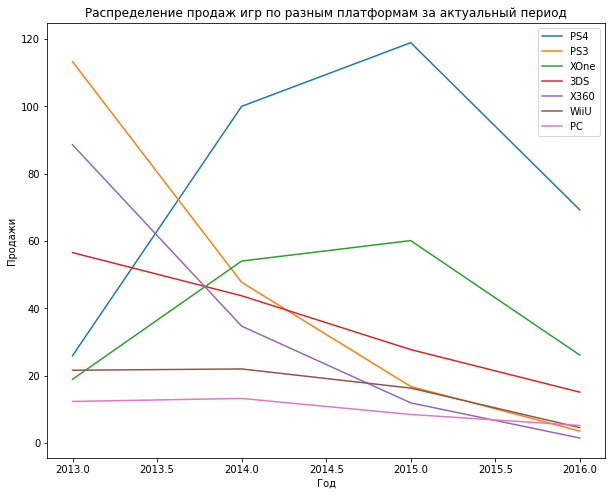

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

In [18]:
data_games_2013 = data_games[data_games['year_of_release'] >= 2013]
data_platform_2013 = data_games_2013.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms_2013 = list(data_platform_2013.index[:7])
plt.figure(figsize=(10,8))
for platform in platforms_2013:
    data_platform_year = data_games_2013[data_games_2013['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(data_platform_year.index, data_platform_year.values, label=platform)
plt.title('Распределение продаж игр по разным платформам за актуальный период')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.legend()
plt.show()

display(data_platform_2013)

Лидерами продаж в период с 2013 по 2016 годы являются PS4, PS3, XboxOne, 3DS и Xbox360. Но на графике видно, как продажи почти всех консолей стремятся вниз (Xbox360, 3DS, PS3), но потенциально прибыльные платформы всё же можно выделить - это PS4 и XboxOne, так как они относительно недавно вышли - судя по предыдущим годам, продажи многих платформы не падали после их выхода на рынок как минимум 3 года.

#### "Ящик с усами" по глобальным продажам.

Построим боксплоты по глобальным продажам игр в разбивке по платформам.

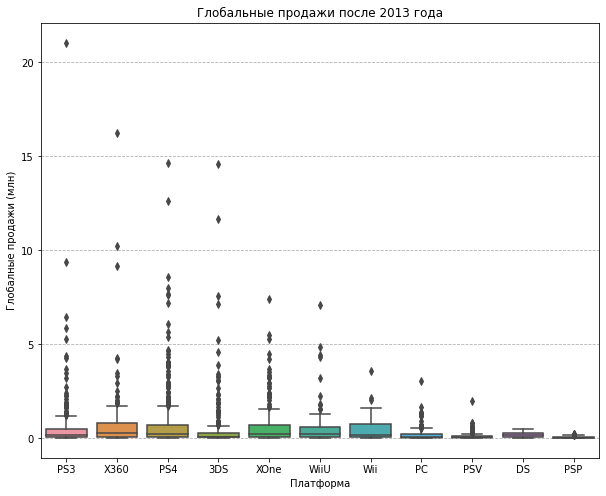

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(x='platform', y='total_sales', data=data_games_2013)
plt.title('Глобальные продажи после 2013 года')
plt.xlabel('Платформа')
plt.ylabel('Глобалные продажи (млн)')
plt.grid(axis='y', linestyle='--')
plt.show()

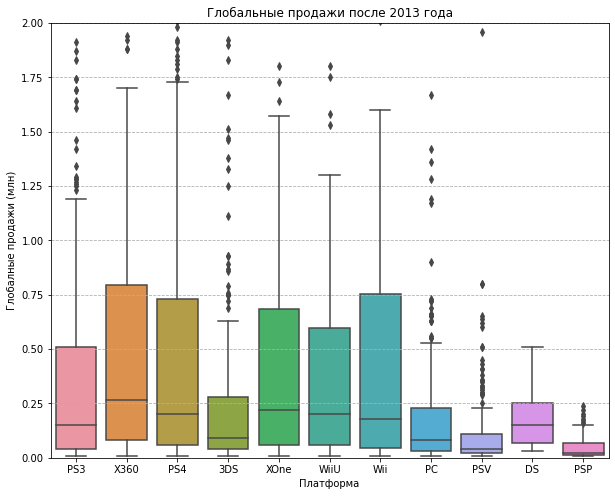

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(x='platform', y='total_sales', data=data_games_2013)
plt.title('Глобальные продажи после 2013 года')
plt.xlabel('Платформа')
plt.ylabel('Глобалные продажи (млн)')
plt.grid(axis='y', linestyle='--')
plt.gca().set_ylim([0, 2])
plt.show()

Как мы видим наибольшая медиана у **Xbox360**, как и размах усов.Дальше по этим свойствам идёт **Wii**. Третье место делят **PS4 и XboxOne**. Распределение продаж похожи у платформ **Xbox360, PS4, XboxOne, Wii**. Наименьшее распределение у **PS Vita и PSP**. Похожие распределения наблюдаются у **PC,3DS и DS**, они имеют маленькое распределение относительно остальных платформ, похожие мелианы, хотя у DS она чуть выше, но при этом у них не такое маленькое распределение как у портативных консолей от Sony. Особняком стоит **PS3**, его распределение продаж довольно большое, но его нельзя отнести к лидерам по размеру распределений, хотя медиана у него почти как у Wii. 

На первом графике можно заметить большое количество выбросов, самый большой зафиксирован у PS3 (20 млн продаж). Такие выбросы можно заметить у всех **относительно популярных платформ** - возможно выбросы связаны со стартом продаж каких-то крупных игр, но пока что такую гипотезу нет надобности проверять.

#### Диаграммы рассеяния

Рассмотрим на примере одной из наиболее популярных платформ, как оценки **критиков и пользователей** могут влиять на продажи и есть ли корреляция между оценками и количеством продаж.

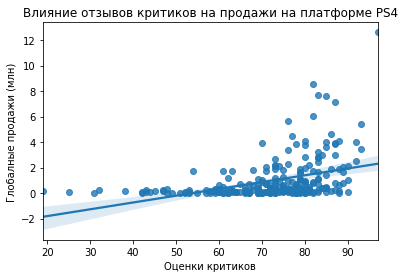

Коэфициент корреляции: 0.40656790206178095


In [21]:
data_ps4 = data_games_2013.query('platform == "PS4"')

sns.regplot(x='critic_score', y='total_sales', data=data_ps4)
plt.title('Влияние отзывов критиков на продажи на платформе PS4')
plt.xlabel('Оценки критиков')
plt.ylabel('Глобалные продажи (млн)')
plt.show()

correlation = data_ps4['critic_score'].corr(data_ps4['total_sales'])
print('Коэфициент корреляции:',correlation)

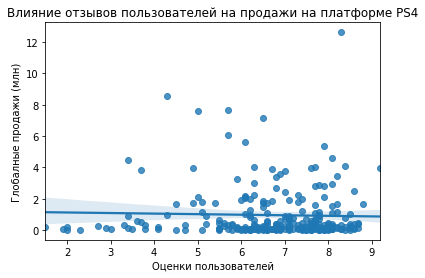

Коэфициент корреляции: -0.031957110204556376


In [22]:
data_ps4 = data_games_2013.query('platform == "PS4"')

sns.regplot(x='user_score', y='total_sales', data=data_ps4)
plt.title('Влияние отзывов пользователей на продажи на платформе PS4')
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобалные продажи (млн)')
plt.show()

correlation = data_ps4['user_score'].corr(data_ps4['total_sales'])
print('Коэфициент корреляции:',correlation)

Как мы видим, корреляция очень слабая в обоих случаях, это может быть связано с огромным количеством пропущенных значений, но даже если мы уберем пропущенные значения - линия вырисовываться не будет. Чтобы убедится, что оценки слабо влияют на продажи игр, построим графики для других популярных платформ.

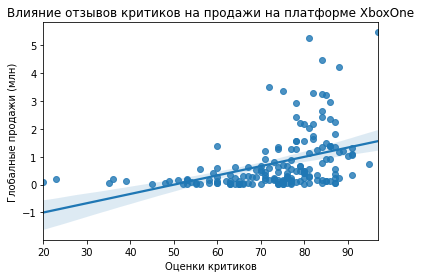

Коэфициент корреляции: 0.4169983280084017


In [23]:
data_xone = data_games_2013.query('platform == "XOne"')

sns.regplot(x='critic_score', y='total_sales', data=data_xone)
plt.title('Влияние отзывов критиков на продажи на платформе XboxOne')
plt.xlabel('Оценки критиков')
plt.ylabel('Глобалные продажи (млн)')
plt.show()

correlation = data_xone['critic_score'].corr(data_xone['total_sales'])
print('Коэфициент корреляции:',correlation)

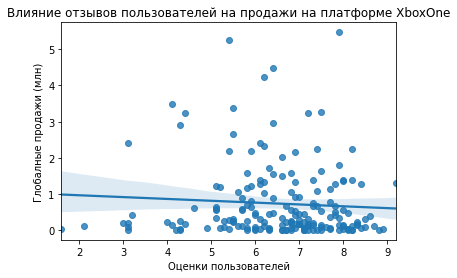

Коэфициент корреляции: -0.06892505328279414


In [24]:
sns.regplot(x='user_score', y='total_sales', data=data_xone)
plt.title('Влияние отзывов пользователей на продажи на платформе XboxOne')
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобалные продажи (млн)')
plt.show()

correlation = data_xone['user_score'].corr(data_xone['total_sales'])
print('Коэфициент корреляции:',correlation)

На платформе XboxOne похожая картина.

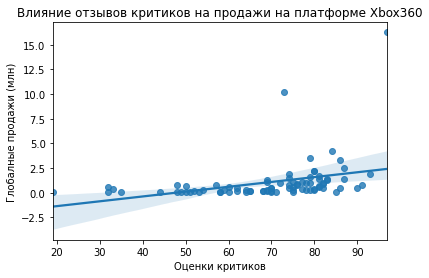

Коэфициент корреляции: 0.3503445460228664


In [25]:
data_x360 = data_games_2013.query('platform == "X360"')

sns.regplot(x='critic_score', y='total_sales', data=data_x360)
plt.title('Влияние отзывов критиков на продажи на платформе Xbox360')
plt.xlabel('Оценки критиков')
plt.ylabel('Глобалные продажи (млн)')
plt.show()

correlation = data_x360['critic_score'].corr(data_x360['total_sales'])
print('Коэфициент корреляции:',correlation)

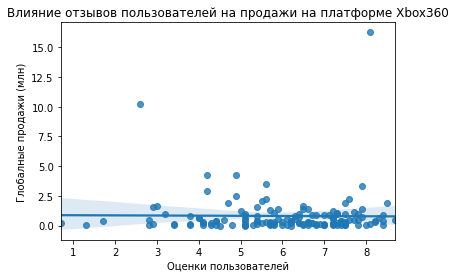

Коэфициент корреляции: -0.011742185147181342


In [26]:
sns.regplot(x='user_score', y='total_sales', data=data_x360)
plt.title('Влияние отзывов пользователей на продажи на платформе Xbox360')
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобалные продажи (млн)')
plt.show()

correlation = data_x360['user_score'].corr(data_x360['total_sales'])
print('Коэфициент корреляции:',correlation)

Такая же картина на платформе Xbox 360.

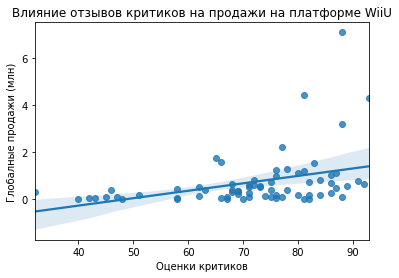

Коэфициент корреляции: 0.3764149065423912


In [27]:
data_wii = data_games_2013.query('platform == "WiiU"')

sns.regplot(x='critic_score', y='total_sales', data=data_wii)
plt.title('Влияние отзывов критиков на продажи на платформе WiiU')
plt.xlabel('Оценки критиков')
plt.ylabel('Глобалные продажи (млн)')
plt.show()

correlation = data_wii['critic_score'].corr(data_wii['total_sales'])
print('Коэфициент корреляции:',correlation)

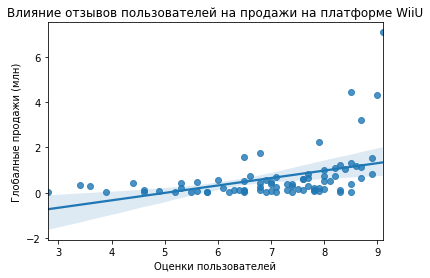

Коэфициент корреляции: 0.4193304819266187


In [28]:
sns.regplot(x='user_score', y='total_sales', data=data_wii)
plt.title('Влияние отзывов пользователей на продажи на платформе WiiU')
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобалные продажи (млн)')
plt.show()

correlation = data_wii['user_score'].corr(data_wii['total_sales'])
print('Коэфициент корреляции:',correlation)

Корреляция во всех случаях слабая, а также очень много значений у 0 - слишком много пропущенных значений в оценках критиков и пользователей, поэтому делать какие либо выводы о наличии сильной корреляции между двумя переменными нельзя - недостаточно данных у двух переменных (оценок пользователей и критиков).

#### Распределение игр по жанрам

Теперь рассмотрим распределение продаж по жанрам. 

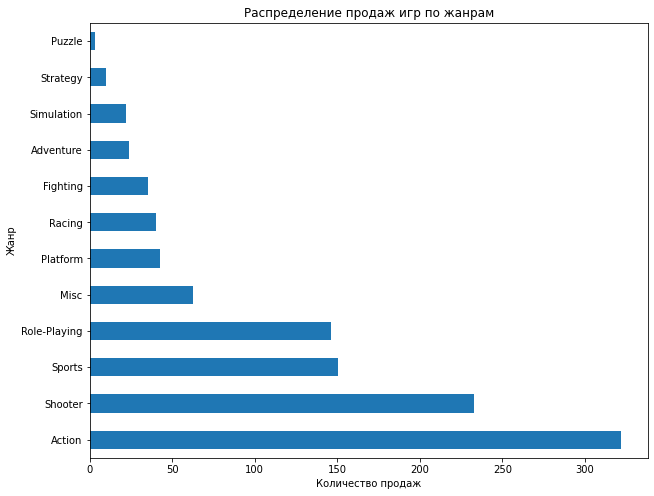

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

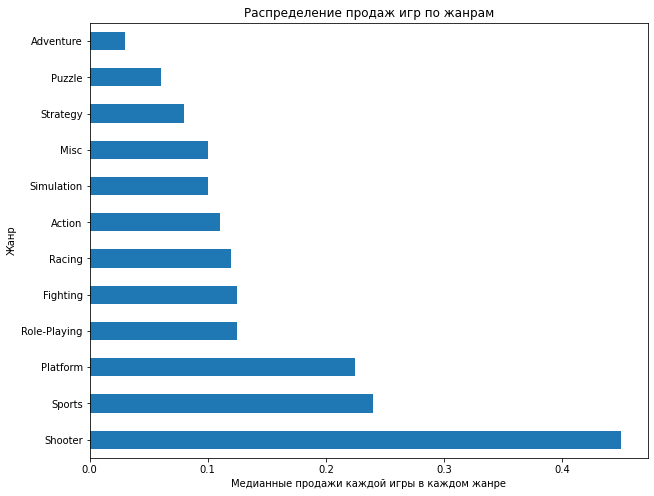

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: total_sales, dtype: float64

In [29]:
data_genre = data_games_2013.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
data_genre_median = data_games_2013.groupby('genre')['total_sales'].median().sort_values(ascending=False)

plt.figure(figsize=(10,8))
data_genre.plot.barh()

plt.xlabel('Количество продаж')
plt.ylabel('Жанр')
plt.title('Распределение продаж игр по жанрам')

plt.show()

display(data_genre)

plt.figure(figsize=(10,8))
data_genre_median.plot.barh()

plt.xlabel('Медианные продажи каждой игры в каждом жанре')
plt.ylabel('Жанр')
plt.title('Распределение продаж игр по жанрам')
plt.show()

display(data_genre_median)

Исходя из графика и таблицы с **общим количеством продаж в каждом жанре**, можно сделать следующий вывод: 
* Жанры Action, Sports, Shooter - лидеры по продажам.
* Жанры Puzzle, Simulation, Strategy - отстают и имеют наименьшие продажи.
* Жанры Platform, Misc, Racing, Fighting - находятся в середине.

Но, следует отметить **медианные продажи**, так как общее количество продаж может искажать всю картину продаж из за наиболее выбивающихся популярных игр в каждом жанре. Тут можно сделать следующий вывод:
* Наибольшие медианные продажи у жанров Shooter, Sports, Platform.
* В середине расположились RPG, Fighting, Racing, Action.
* Наименьшая медиана у платформ - Adventure, Puzzle, Strategy. 

Некоторые значения очень сильно удивляют - так у экшн игр наибольшие общие продажи, но медианные продажи у них расположились по середине. Противоположная ситуация с платформерами - тут мы имеем сравнительно маленькие общие продажи, но медианные продажи находятся на 3 месте, недалеко от спортивных игр. Но несмотря на такие различия у общих и медианных продаж общие лидеры и "отстающие" - шутеры и спортивные игры находятся в лидерах продаж, в то время как отстающими всё так же остаются жанры Puzzle и Strategy. 

#### Промежуточные итоги 

1. **Значение данных за разные периоды:**

Игры по годам распределены неравномерно, с пиком в 2008-2010 годах. Для прогнозирования продаж на будущие годы предпочтительно использовать данные за последние 5-10 лет, так как за этот период можно выявить основные тенденции.

2. **Актуальный период для прогноза на 2017 год:**

Лидерами продаж в период с 2013 по 2016 годы являются PS4, PS3, XboxOne, 3DS и Xbox360. Несмотря на общий тренд снижения продаж, потенциально прибыльными платформами остаются PS4 и XboxOne, учитывая их недавний выход на рынок.

3. **Распределение продаж по платформам:**

Боксплоты позволяют сделать выводы о характеристиках распределения продаж по разным платформам. Например, Xbox360 имеет самую большую медиану и размах усов, что указывает на широкий диапазон продаж.

4. **Влияние оценок критиков на продажи:**

Корреляция между оценками критиков и продажами игр оказывается слабой, возможно, из-за большого количества пропущенных значений. Это указывает на то, что оценки критиков не являются определяющим фактором для продаж игр.

5. **Распределение продаж по жанрам:**

**Общие продажи**: 
* Жанры Action, Sports, Shooter - лидеры по продажам.
* Жанры Puzzle, Simulation, Strategy - отстают и имеют наименьшие продажи.
* Жанры Platform, Misc, Racing, Fighting - находятся в середине.

**Медианные продажи**:
* Наибольшие медианные продажи у жанров Shooter, Sports, Platform.
* В середине расположились RPG, Fighting, Racing, Action.
* Наименьшая медиана у платформ - Adventure, Puzzle, Strategy. 

### Портрет пользователя каждого региона

#### Самые популярные платформы в каждом регионе

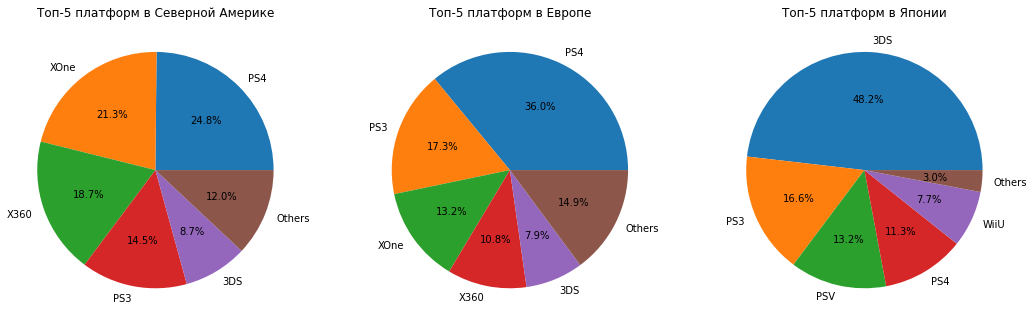

In [30]:
na_platform_sales = data_games_2013.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platform_sales = data_games_2013.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platform_sales = data_games_2013.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

other_platform_na_sales = data_games_2013['na_sales'].sum() - na_platform_sales.sum()
other_platform_eu_sales = data_games_2013['eu_sales'].sum() - eu_platform_sales.sum()
other_platform_jp_sales = data_games_2013['jp_sales'].sum() - jp_platform_sales.sum()

na_platform_labels_all = list(na_platform_sales.index) + ['Others']
eu_platform_labels_all = list(eu_platform_sales.index) + ['Others']
jp_platform_labels_all = list(jp_platform_sales.index) + ['Others']

na_platform_sales_all = list(na_platform_sales.values) + [other_platform_na_sales]
eu_platform_sales_all = list(eu_platform_sales.values) + [other_platform_eu_sales]
jp_platform_sales_all = list(jp_platform_sales.values) + [other_platform_jp_sales]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(na_platform_sales_all, labels=na_platform_labels_all, autopct='%1.1f%%')
axs[0].set_title('Топ-5 платформ в Северной Америке')

axs[1].pie(eu_platform_sales_all, labels=eu_platform_labels_all, autopct='%1.1f%%')
axs[1].set_title('Топ-5 платформ в Европе')

axs[2].pie(jp_platform_sales_all, labels=jp_platform_labels_all, autopct='%1.1f%%')
axs[2].set_title('Топ-5 платформ в Японии')




#plt.figure(figsize=(15, 6))
#plt.subplot(1, 3, 1)
#sns.barplot(x=na_platform_sales.index, y=na_platform_sales.values)
#plt.title('Топ-5 платформ в Северной Америке')
#plt.xlabel('Платформа')
#plt.ylabel('Суммарные продажи (млн)')

#plt.subplot(1, 3, 2)
#sns.barplot(x=eu_platform_sales.index, y=eu_platform_sales.values)
#plt.title('Топ-5 платформ в Европе')
#plt.xlabel('Платформа')
#plt.ylabel('Суммарные продажи (млн)')

#plt.subplot(1, 3, 3)
#sns.barplot(x=jp_platform_sales.index, y=jp_platform_sales.values)
#plt.title('Топ-5 платформ в Японии')
#plt.xlabel('Платформа')
#plt.ylabel('Суммарные продажи (млн)')

plt.show()

Продажи платформ в Северной Америке и Европе не сильно отличаются (топ состоит из одинаковых платформ), но заметные различия всё же есть - это количество продаж для каждой отдельной платформы, а также само расположение платформ в топе. В обоих странах лидер продаж - **PS4**. 
Но в Америке игры на платформах **XboxOne и Xbox360** продаются в больших количествах, чем в Европе, возможно это связано с тем, что платформа Xbox распространена больше в Америке, чем в Европе.  
Платформа **3DS** находится на последнем месте в обоих регионах, с похожим количеством продаж. 
Игры на **PS3** тоже имеют похожее количество продаж, но в Европе платформа на 2 месте, а в Северной Америке на 4.

Говоря про Японию, мы видим значительные различия от первых двух регионов. Если в Северной Америке мы видели некоторую тенденцию, что игры на платформах страны производителя продаются больше, то в Японии мы видим, что в топе **все игры продаются на платформах от Японских компаний (Sony и Nintendo)**.
Также заметим, что в Япнии доминируют игры на **портативных платформах (3DS и PSV)**. Суммарные продажи игр на стационарных платформах (PS3, PS4, WiiU) не покрывают даже все продажи игр на 3DS.

#### Самые популярные жанры в каждом регионе

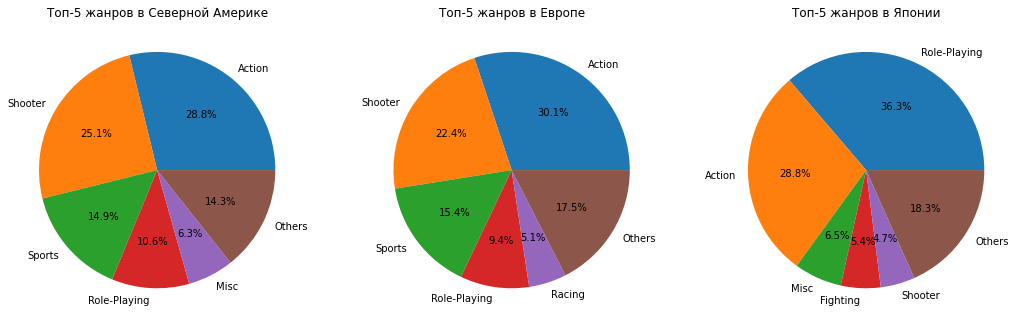

In [31]:
na_genre_sales = data_games_2013.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_genre_sales = data_games_2013.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_genre_sales = data_games_2013.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

other_genre_na_sales = data_games_2013['na_sales'].sum() - na_genre_sales.sum()
other_genre_eu_sales = data_games_2013['eu_sales'].sum() - eu_genre_sales.sum()
other_genre_jp_sales = data_games_2013['jp_sales'].sum() - jp_genre_sales.sum()


na_genre_labels_all = list(na_genre_sales.index) + ['Others']
eu_genre_labels_all = list(eu_genre_sales.index) + ['Others']
jp_genre_labels_all = list(jp_genre_sales.index) + ['Others']

na_genre_sales_all = list(na_genre_sales.values) + [other_genre_na_sales]
eu_genre_sales_all = list(eu_genre_sales.values) + [other_genre_eu_sales]
jp_genre_sales_all = list(jp_genre_sales.values) + [other_genre_jp_sales]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(na_genre_sales_all, labels=na_genre_labels_all, autopct='%1.1f%%')
axs[0].set_title('Топ-5 жанров в Северной Америке')

axs[1].pie(eu_genre_sales_all, labels=eu_genre_labels_all, autopct='%1.1f%%')
axs[1].set_title('Топ-5 жанров в Европе')

axs[2].pie(jp_genre_sales_all, labels=jp_genre_labels_all, autopct='%1.1f%%')
axs[2].set_title('Топ-5 жанров в Японии')


#plt.subplot(1, 3, 2)

#plt.subplot(1, 3, 3)

#plt.figure(figsize=(15, 5))
#plt.subplot(1, 3, 1)
#sns.barplot(x=na_genre_sales.index, y=na_genre_sales.values)
#plt.title('Топ-5 жанров в Северной Америке')
#plt.xlabel('Жанр')
#plt.ylabel('Суммарные продажи (млн)')

#plt.subplot(1, 3, 2)
#sns.barplot(x=eu_genre_sales.index, y=eu_genre_sales.values)
#plt.title('Топ-5 жанров в Европе')
#plt.xlabel('Жанр')
#plt.ylabel('Суммарные продажи (млн)')

#plt.subplot(1, 3, 3)
#sns.barplot(x=jp_genre_sales.index, y=jp_genre_sales.values)
#plt.title('Топ-5 жанров в Японии')
#plt.xlabel('Жанр')
#plt.ylabel('Суммарные продажи (млн)')



plt.show() 

В Европе, как и в Северной Америке - похожие топы, меняется лишь последнее место. Так в Америке больше популярен жанр **Misc**, в то время как в Европе на 5 месте находится рейсинги. Также продажи шутеров в Америке выше примерно на 10 миллионов, в остальном же цифры продаж похожи. 

Япония так же как и в прошлый раз стоит особняком. Самый популярный жанр - **РПГ, на втором месте расположились экшн игры** (как можно заметить, они относительно популярны во всех регионах). Ну а игры в остальных жанрах имеют меньше 10 миллионов продаж и скорее занимают нишевый характер, что в случае с шутерами довольно сильно выбивается из картины по сравнению с остальными регионами.

#### Влияние рейтинга ESRB на продажи в каждом регионе

/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


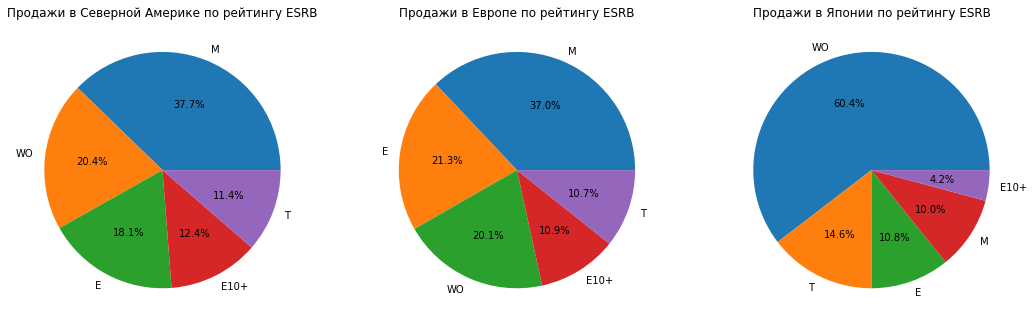

In [32]:
data_games_2013['rating'].fillna('WO', inplace=True)
na_esrb_sales = data_games_2013.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_esrb_sales = data_games_2013.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_esrb_sales = data_games_2013.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(na_esrb_sales, labels=na_esrb_sales.index, autopct='%1.1f%%')
axs[0].set_title('Продажи в Северной Америке по рейтингу ESRB')


axs[1].pie(eu_esrb_sales, labels=eu_esrb_sales.index, autopct='%1.1f%%')
axs[1].set_title('Продажи в Европе по рейтингу ESRB')


axs[2].pie(jp_esrb_sales, labels=jp_esrb_sales.index, autopct='%1.1f%%')
axs[2].set_title('Продажи в Японии по рейтингу ESRB')

#plt.figure(figsize=(15, 5))
#plt.subplot(1, 3, 1)
#sns.barplot(x=na_esrb_sales.index, y=na_esrb_sales.values)
#plt.title('Продажи в Северной Америке по рейтингу ESRB')
#plt.xlabel('Рейтинг ESRB')
#plt.ylabel('Суммарные продажи (млн)')

#plt.subplot(1, 3, 2)
#sns.barplot(x=eu_esrb_sales.index, y=eu_esrb_sales.values)
#plt.title('Продажи в Европе по рейтингу ESRB')
#plt.xlabel('Рейтинг ESRB')
#plt.ylabel('Суммарные продажи (млн)')

#plt.subplot(1, 3, 3)
#sns.barplot(x=jp_esrb_sales.index, y=jp_esrb_sales.values)
#plt.title('Продажи в Японии по рейтингу ESRB')
#plt.xlabel('Рейтинг ESRB')
#plt.ylabel('Суммарные продажи (млн)')

plt.show()

Европа и Америка опять имеют похожие продажи в случае с рейтингами ESRB. Доминирует в обоих регионах рейтинг **M (Mature)**, то есть игры не подходящие для лиц младше 17 лет. На 2 и 3 месте игры для всех и всех старше 10 лет **(E и E10+)**. Игры для подростков не так популярны по сравнению с вышеперечисленными жанрами. **Около 20 процентов игр не имеют рейтинга** в Европе и Северной Америке

В Японии картина меняется. **Около 60 процентов всех игр не имеют рейтинга ESRB**. Говоря про остальные 40% - игры с рейтингом **T (Teen)**, находятся в лидерах продаж, а игры в жанре **E и E10+** (суммарно) по продажам обгоняют игры с рейтингом **M**. Следует посмотреть в сущность рейтинга ESRB, так как больше он распространён в Северной Америке и Европе, при этом в большинстве своем он не распространяется на японские игры. Для анализа местного игрового рынка лучше использовать местные и характерные для японского рынка метрики оценки возрастного рейтинга для игр - **рейтинг ESRB не совсем подходит для анализа продаж на японском рынке**.

In [33]:
# Комментарий ревьюера
temp = data_games_2013.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

0 0.0


WO      977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

#### Промежуточные итоги.

1. **Продажи платформ:**

В Северной Америке и Европе основные топовые платформы схожи, но наблюдаются некоторые различия в количестве продаж и их распределении.
В Японии наблюдается явное предпочтение к платформам от японских производителей, особенно к портативным консолям.

2. **Продажи по жанрам:**

В Северной Америке и Европе в топе присутствуют схожие жанры, но с небольшими различиями в последних местах.
В Японии преобладают игры жанра РПГ и экшн, отличаясь от предпочтений западных рынков.

3. **Продажи по рейтингам ESRB:**

В Европе и Северной Америке наиболее популярны игры с рейтингом M (Mature), подходящие для взрослой аудитории.
В Японии предпочтения отличаются - тут нельзя говорить о доминировании какого либо возрастного рейтинга, так как 60% всех игр просто не имеют рейтинга ESRN.

4. **Портреты пользователей:**
* Портрет пользователя из Северной Америки: пользователи от 17 лет, играющие преимущественно в Шутеры, Экшн, Спорт,РПГ  и жанр Misc на стационарных консолях от Sony/Microsoft.
* Портрет пользователя из Европы: пользователи от 17 лет, играющие преимущественно такие же жанры, что и Американские пользователи, но отдающие предпочтения Гонкам, вместо жанра Misc на стационарных консолях (преимущественно Sony)
* Портрет пользователя из Японии: пользователи любого возраста, играющие преимущественно в РПГ на портативных консолях от Sony и Nintendo. 




### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Нулевая гипотеза (H0)**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза (H1)**: Средние пользовательские рейтинги платформ Xbox One и PC различаются. (двусторонняя альтернативная гипотеза)

**Критерий проверки гипотез:**

Мы используем независимый t-тест, потому что он подходит для сравнения средних двух независимых выборок, так как сравниваем мы две абсолютно разные платформы.

In [34]:
xbox_one_ratings = data_games_2013[data_games_2013['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = data_games_2013[data_games_2013['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05 

results = st.ttest_ind(xbox_one_ratings, pc_ratings)

print('p-значение:', results.pvalue)
print('средние значение для платформы xbox', xbox_one_ratings.mean())
print('средние значение для  PC', pc_ratings.mean())

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различаются.')
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги двух платформ не различаются.")

p-значение: 0.14012658403611647
средние значение для платформы xbox 6.521428571428572
средние значение для  PC 6.2696774193548395
Не отвергаем нулевую гипотезу: средние пользовательские рейтинги двух платформ не различаются.


#### Средние пользовательские рейтинги жанров Action  и Sports разные.

**Нулевая гипотеза (H0)**: Средние пользовательские рейтинги жанров Action и Sports не различаются.

**Альтернативная гипотеза (H1)**: Средние пользовательские рейтинги жанров Action и Sports различаются.

**Критерий проверки гипотез:**

Мы будем опять используем независимый t-тест, потому что он подходит для сравнения средних двух независимых выборок. Тут мы уже сравниваем два разных жанра, и так как в таблице указан только один жанр для каждой игр, то можно счиать, что переменные действительно независимые.

In [35]:
action_ratings = data_games_2013[data_games_2013['genre'] == 'Action']['user_score'].dropna()
sports_ratings = data_games_2013[data_games_2013['genre'] == 'Sports']['user_score'].dropna()

results = st.ttest_ind(action_ratings, sports_ratings)

print('p-значение:', results.pvalue)
print('средние значение для экшн игр', action_ratings.mean())
print('средние значение для спортивных игр', sports_ratings.mean())

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не отвергаем нулевую гипотезу: нет значимых различий между средними пользовательскими рейтингами жанров Action и Sports.")

p-значение: 1.0517832389140023e-27
средние значение для экшн игр 6.837532133676092
средние значение для спортивных игр 5.238124999999999
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.


#### Промежуточные итоги.
1. Первая гипотеза подтвердиалсь, средние пользовательские рейтинги платформ Xbox One и PC одинаковые, так как при проведении независимого t-теста мы не увидели сколь либо значимых значений, превышающих уровень статистической значимости. 
2. Вторая гипотеза тоже подтвердилась - средние пользовательские рейтинги жанров Action и Sports разные. Для этого нам пришлось отвергнуть нулевую гипотезу, в которой утверждалось, что различий нет. Альтернативная гипотеза подтвердилась, так как p-значение больше уровня статистической значимости. 

## Общий вывод

**1. Подготовка данных:**

* Проведены косметические улучшения: названия столбцов приведены к нижнему регистру.
* Обработаны типы данных: год релиза преобразован в int64, пользовательские оценки - в float64.
* Проанализированы пропуски: много пропусков в оценках критиков/пользователей/возрастном рейтинге.
* Значение 'tbd' в user_score заменено на NaN.
* Пропуски в дате релиза оставлены (незначительное количество).
* Добавлен столбец с суммарными продажами.
* Дубликаты не найдены.

**2. Анализ данных:**

* **Распределение по годам:** пик в 2008-2010 годах. Для прогноза на будущее использованы данные за последние 5-10 лет.
* **Актуальный период для прогноза на 2017 год:** 2013-2016. Лидеры продаж: PS4, PS3, XboxOne, 3DS, Xbox360. Потенциально прибыльные: PS4, XboxOne.
* **Распределение по платформам:** Xbox360 - самая большая медиана и размах усов (широкий диапазон продаж).
* **Влияние оценок критиков:** слабая корреляция с продажами (много пропусков). Оценки критиков не являются определяющим фактором.
* **Распределение по жанрам:** лидеры - Spots, Shooter; наименьшие продажи - Puzzle, Strategy.

* **Портрет пользователей по регионам:**

**Северная Америка:**

*Платформы:* Лидером продаж является PS4, но также популярны платформы XboxOne и Xbox360. Это  может свидетельствовать о конкуренции между продуктами Sony и Microsoft на этом рынке.

*Жанры:* Шутеры, Экшн, Спорт,РПГ  и жанр Misc пользуются популярностью.

*Рейтинг ESRB:* Преобладают игры с рейтингом M (Mature), что свидетельствует о спросе на контент для взрослых пользователей.

Портрет: пользователи от 17 лет, играющие преимущественно в Шутеры, Экшн, Спорт,РПГ  и жанр Misc на стационарных консолях от Sony/Microsoft.

**Европа:**

*Платформы:* Схожая ситуация с Северной Америкой, лидирует PS4, но с некоторыми отличиями в количестве продаж платформ Xbox. В 

*Жанры:* Предпочтения по жанрам в целом схожи с Америкой, но в Европе больше популярны гонки, чем в Северной Америке.

*Рейтинг ESRB:* Также преобладают игры с рейтингом M (Mature).

Портрет: пользователи от 17 лет, играющие преимущественно в Шутеры, Экшн, Спорт,РПГ  и жанр Misc на стационарных консолях от Sony/Microsoft. 

**Япония:**

*Платформы:* Продажи полностью доминируются платформами от японских производителей - Sony и Nintendo, причем портативные платформы (3DS, PSV) наиболее популярны.

*Жанры:* РПГ - наиболее популярный жанр Экшн игры также пользуются спросом. Остальные жанры, включая шутеры, имеют нишевое положение.

*Рейтинг ESRB:* большинство игр не имеют рейтинга ESRB, поэтому мы мало что можем сказать исходя из этого.

Портрет: пользователи всех возрастов, играющие преимущественно в РПГ на портативных консолях от Sony и Nintendo.


**3. Подтверждение гипотез:**

* **Первая гипотеза:** средние пользовательские рейтинги Xbox One и PC одинаковые (подтверждена).
* **Вторая гипотеза:** средние пользовательские рейтинги Action и Sports разные (подтверждена).


**4. На что тратить рекламный бюджет?**

В основе рекламной кампании стоит выбор платформы, на которой будут продвигаться игры. Рекомендуется сосредоточиться на 1-2 платформах с высокими продажами и широкой аудиторией. Возможные варианты - PS4, Xbox One, и Nintendo 3DS, учитывая их популярность в различных регионах.

Анализируя данные о продажах по жанрам, стоит отдать предпочтение жанрам с высокими объемами продаж. Например, в Северной Америке и Европе стоит обратить внимание на жанры Misc и шутеры, а в Японии - на РПГ и экшн игры.

При выборе игры для рекламы важно учитывать ее рейтинг ESRB, чтобы ориентироваться на целевую аудиторию. В Европе и Северной Америке доминируют игры с рейтингом M (Mature), а в Японии делать выводы по этому рейтингу тяжело.

Поскольку игровые предпочтения различаются в разных регионах, важно учитывать эту специфику при планировании рекламной кампании. Например, в Северной Америке широко распространены игры на Xbox, в то время как в Японии популярны игры на портативных платформах Nintendo.

Учитывая большую изученность рынка для Северной Америки и Европы, **лучшим решением будет продвигать игры на платформе PS4 с рейтингом M, а также в жанре Shooter или Sports**, так как именно они имеют наибольшие общие и медианные продажи.

